# Coverage of cord19 data

This notebook outlines preliminary findings of the coverage of cord19 data.

Screenshots and other relevant images can be found under the `img/` directory, and can be displayed in this notebook using

    ![title](img/picture.png)

where applicable.

## Geographic coverage
CORD19 does not offer geographic coverage. We could merge the `metadata.csv` table with this [CORD19/MAG mapping](https://github.com/microsoft/mag-covid19-research-examples/blob/master/src/data/releases.md#cord-19-metadata-with-more-comprehensive-mag-id-mapping), fetch author affiliations and then geocode them.

In principle, this should give us full geographic coverage of the covid-19 research.

**Note**: `metadata.csv` has a `mag_id` field but it's mostly empty. We have to use the mapping I added a link to above.

## Temporal coverage
CORD19 covers all COVID-19 and coronavirus-related research (this means pre-2020 research too).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../collect/metadata.csv')
df.columns

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

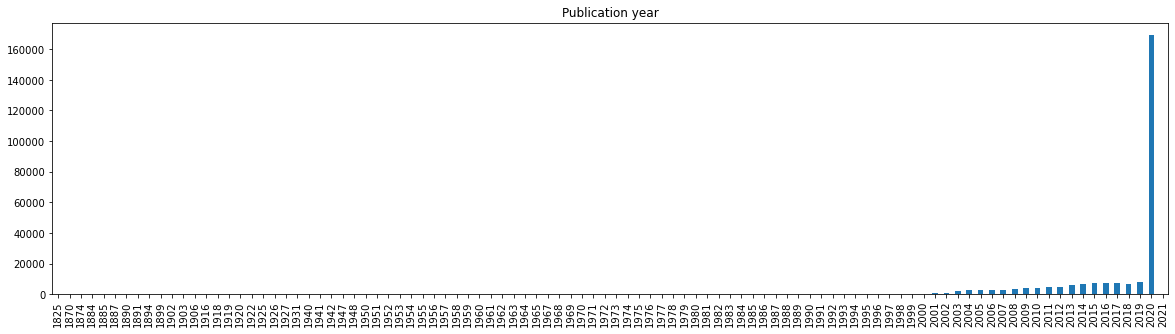

In [3]:
df['publication_year'] = df.publish_time.apply(lambda x: x[:4] if isinstance(x, str) else x)
df = df.drop_duplicates('cord_uid')
df.publication_year.value_counts().sort_index().plot(kind='bar', figsize=(20,5), title='Publication year')

### Is the data:

The data is updated daily. Older data dumps are still accessible.

## Ecosystem coverage

### List which ecosystems are covered by this dataset
CORD19 covers:
- PubMed's PMC open access corpus using this query (COVID-19 and coronavirus research)
- Additional COVID-19 research articles from a corpus maintained by the WHO
- bioRxiv and medRxiv pre-prints using the same query as PMC (COVID-19 and coronavirus research)

This means that most of the COVID-19 related research is covered by it.

### To what extent could there be partial coverage or blindspots?

If we were to match MAG with CORD19 to get the author affiliations and geocode them, we would miss ~17% of the publications. It's also not clear if NIH documents are included in the collection (I assume they are not).